# WILD LIFE CLASSIFICATION

CLASSIFICATION OF CHEETAH AND TIGER

# WORKING ON DATASET

IMPORT LIBRARIES

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

FUNCTION TO LOAD IMAGES

In [2]:
def load_images(folder_path):
    images = []
    labels = []
    for label, animal in enumerate(os.listdir(folder_path)):
        for image_name in os.listdir(os.path.join(folder_path, animal)):
            image_path = os.path.join(folder_path, animal, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))
            images.append(image.flatten())
            labels.append(label)
    return np.array(images), np.array(labels)

In [3]:
def print_images_with_labels(images, actual_labels, predicted_labels, class_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(100, 100, 3))
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_title(f"Actual: {class_names[actual_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}")

    plt.show()


LOADING DATASET

In [4]:
data_folder = "Animals"
X, y = load_images(data_folder)
class_names = ["cheetah", "tiger"]

SPLITTING DATASET TO TRAIN AND TEST

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL-1 KNN

MAKING PREDICTIONS

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

EVALUATING PREDICTIONS

In [7]:
knn_accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy:",knn_accuracy)
print("Precision:",precision)
print("F1 Score:",f1)
print("Recall:",recall)

Accuracy: 0.8125
Precision: 1.0
F1 Score: 0.7692307692307693
Recall: 0.625


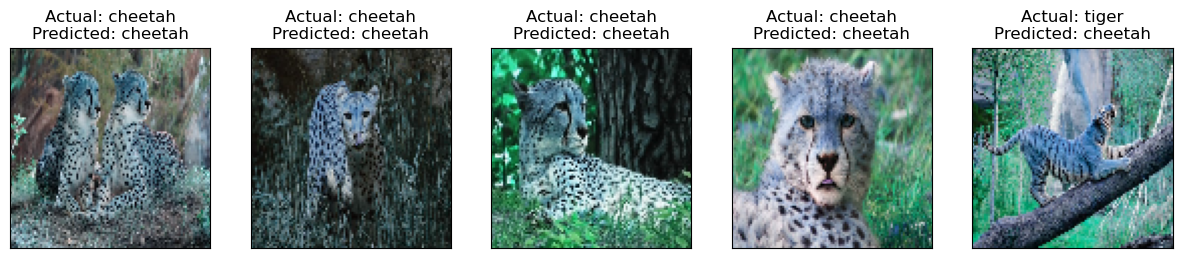

In [8]:
print_images_with_labels(X_test, y_test, y_pred, class_names)

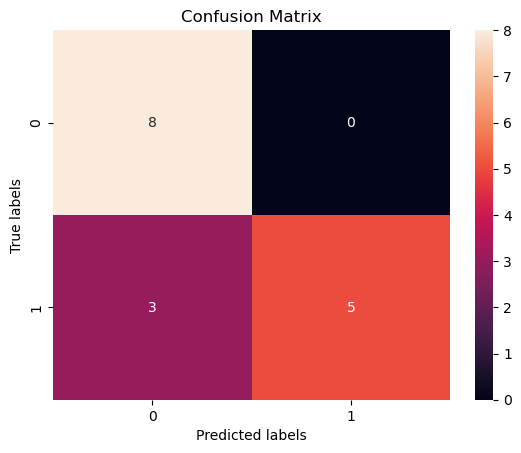

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# MODEL-2 RANDOM FOREST

MAKING PREDICTIONS

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

EVALUATING PREDICTIONS

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
rf_accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy:",rf_accuracy)
print("Precision:",precision)
print("F1 Score:",f1)
print("Recall:",recall)

Accuracy: 0.75
Precision: 0.8333333333333334
F1 Score: 0.7142857142857143
Recall: 0.625


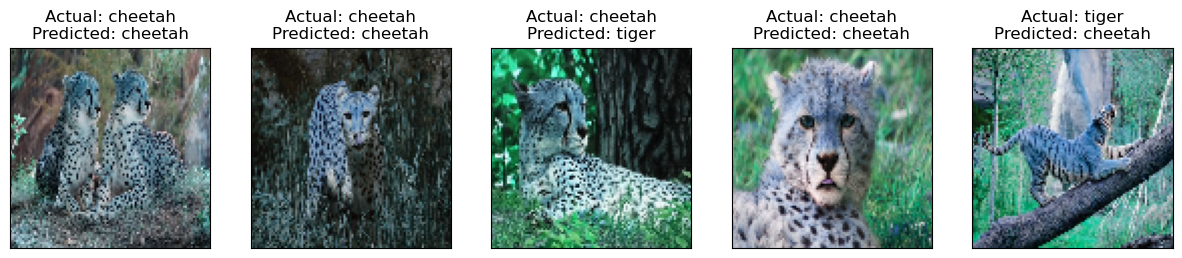

In [12]:
print_images_with_labels(X_test, y_test, y_pred, class_names)

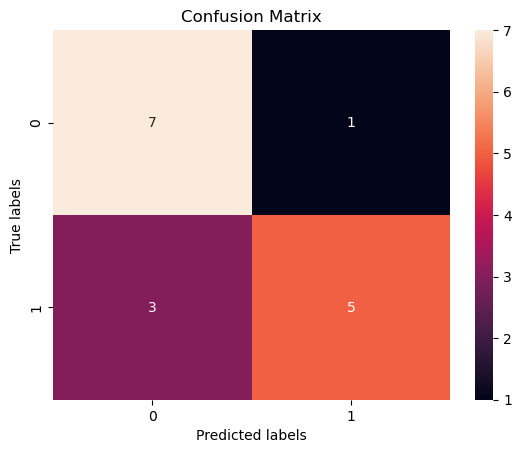

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# MODEL-3 DECISION TREE

MAKING PREDICTIONS

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

EVALUATING PREDICTIONS

In [15]:
dt_accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy:",dt_accuracy)
print("Precision:",precision)
print("F1 Score:",f1)
print("Recall:",recall)

Accuracy: 0.875
Precision: 1.0
F1 Score: 0.8571428571428571
Recall: 0.75


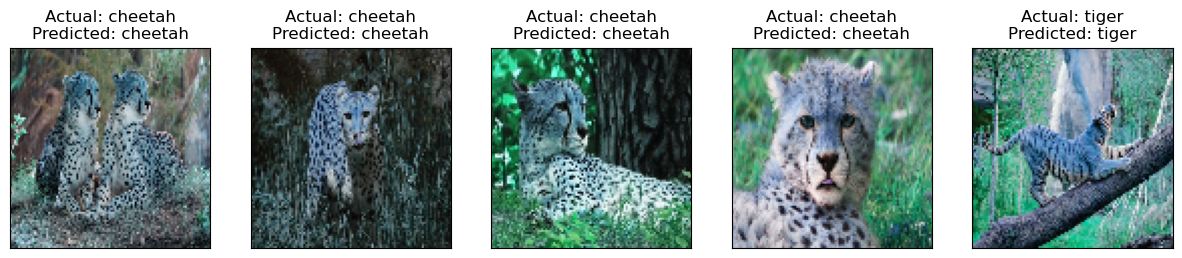

In [16]:
print_images_with_labels(X_test, y_test, y_pred, class_names)

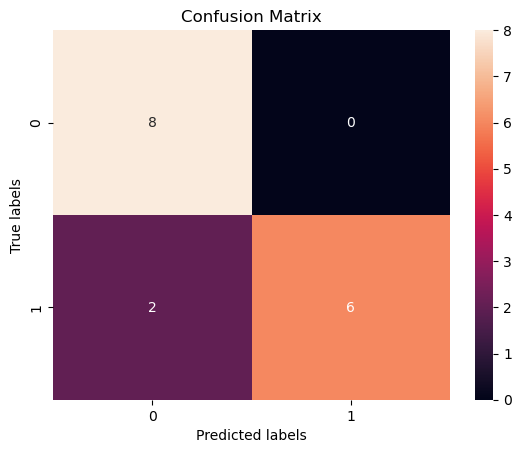

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# FINAL COMPARISON OF 3 MODELS

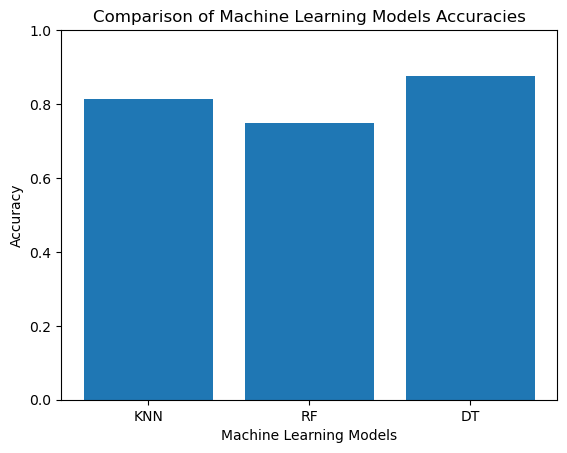

In [18]:
models = ['KNN', 'RF', 'DT']
accuracies = [knn_accuracy, rf_accuracy, dt_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Models Accuracies')
plt.ylim(0, 1)
plt.show()

# END